In [2]:
# environment 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns 

print('ready')

ready


# Variance

Variance indicates how spreadout the values are

In [3]:
prices = [45, 56, 34, 98, 12, 30, 29, 68, 25, 75, 65, 34]

In [4]:
prices

[45, 56, 34, 98, 12, 30, 29, 68, 25, 75, 65, 34]

In [5]:
# variance
variance = np.var(prices)
variance

574.2430555555555

# Standard Deviation

this is the square root of the variance

In [6]:
SD = np.sqrt(variance)
print("The SD is ", SD)

The SD is  23.963369036000667


In [7]:
# directly from numpy 
print("S.D is ", np.std(prices))

S.D is  23.963369036000667


# Percentiles 

- used to give a number that describes the value that a given percent of the data is lower than

- usually categorized as 25th, 50th, 75th and 90th percentiles

In [8]:
np.percentile(prices, 75)

65.75

In [12]:
prices.sort()
prices

[12, 25, 29, 30, 34, 34, 45, 56, 65, 68, 75, 98]

In [13]:
np.percentile(prices, 25)

29.75

the above result implies that 25% of the price values are 29.75 or lower

# find the 50th and 90th percentile and explain the result

# Quartiles 

used to seperate the data into 4 equal parts

In [14]:
x = np.quantile(prices,[0,0.25,0.5,0.75,1])
print(x)

[12.   29.75 39.5  65.75 98.  ]


In [15]:
# Explanantion
# Q0, Q1, Q2, Q3, Q4
# Q0 to Q1 are the 25% lowest values in the data 
# between Q1 to Q2 next 25% and so on...

# Q0 is the smallest value 
# Q1 is the value separating the 1st quarter from the 2nd quarter
# Q2 is the middle value (median)
# Q3 is the value separating the 3rd quarter from the 4th 
# Q4 is the largest value in the data 

# Range 

this is the difference between the lowest and highest values

In [17]:
# range from numpy use the ptp method

x = np.ptp(prices)

print(x) # range is 

86


# Regression 

Linear Regression

the term regression is used when trying to find the relationship btw variables

Linear regression uses the relationship btw data-points to draw a straight line through them

# Crude oil production vs export

In [19]:
url = './datasets/crudeoil.csv'
df = pd.read_csv(url)
del df["Unnamed: 5"]
df.head(3)

,Year,Month,Crude Oil Price,Production,Crude Oil Export
0,2006,1,63.85,2.59,2.14
1,2006,2,61.33,2.47,2.02
2,2006,3,65.00,2.25,1.80


In [20]:
df.columns

Index(['Year', 'Month', 'Crude Oil Price', 'Production', 'Crude Oil Export'], dtype='object')

In [21]:
x = df["Production"]
y = df["Crude Oil Export"]

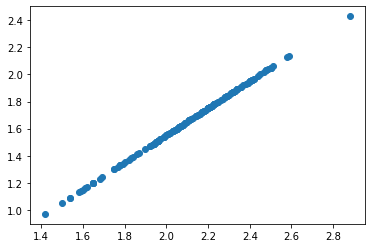

In [22]:
plt.scatter(x,y)

In [28]:
speed = [92, 86, 80, 87, 100, 86,
         94, 78, 77, 86]
weight = [998, 1002, 1012,1034, 995, 1105,
          1150, 1230,1340,1450]

In [31]:
# speed and weigth of different buses given above

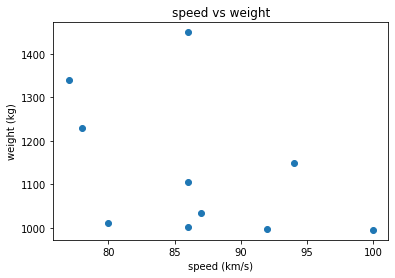

In [32]:
plt.title("speed vs weight")
plt.xlabel("speed (km/s)")
plt.ylabel("weight (kg)")
plt.scatter(speed, weight)

In [33]:
# check linear regression using the stats module 

stats.linregress(speed, weight)

LinregressResult(slope=-9.716694772344011, intercept=1973.0657672849911, rvalue=-0.43875135020573985, pvalue=0.2046277368923375, stderr=7.035996711948861, intercept_stderr=611.2414577861189)

In [35]:
# destructuring
slope, intercept, r,p,stderr = stats.linregress(speed, weight)

In [36]:
slope

-9.716694772344011

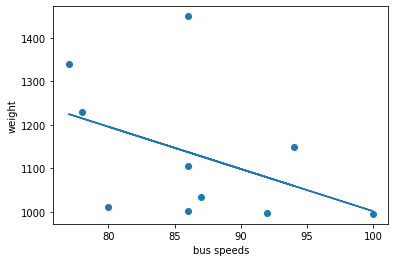

In [37]:
# y = mx + c

# create a function to get new values of y 

def myFunc(x):
    return slope * x + intercept 

# run each value of x through the function
# this will give us new values of y 

new_y = list(map(myFunc, speed))


# draw scatter plot 
plt.scatter(speed, weight)

# draw the line
plt.xlabel('bus speeds')
plt.ylabel('weight')
plt.plot(speed, new_y)

In [38]:
# find the weight of a bus moving at 93

w = myFunc(93)

print(w)

1069.413153456998


In [39]:
# the r value (-0.43...) shows us that linear regression doest give the best fit

In [40]:
# ploynomial regression

model = np.poly1d(np.polyfit(speed, weight, 3))


In [42]:
print(model(93))

1111.211556589682


In [43]:
model

poly1d([-1.04317673e-01,  2.78279000e+01, -2.47285056e+03,  7.43114568e+04])

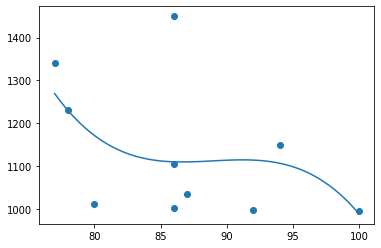

In [53]:
plt.scatter(speed,weight)
myline = np.linspace(min(speed), max(speed) , 100) # line based on speed values
plt.plot(myline, model(myline))

# Pandas Methods for Data Cleaning, indexing and Grouping